<a href="https://colab.research.google.com/github/singhvarun404/AIML_2020/blob/master/August_20th_Task_1_n_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as tf
import numpy as np
import cv2

In [2]:
mnist = tf.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


**Creating the model**

In [3]:
### Creating the model
model = tf.models.Sequential()

### Adding layers to nn
model.add(tf.layers.Flatten())   ###--->Input layer
model.add(tf.layers.Dense(784,activation = 'relu'))  ###--->Hidden layer
model.add(tf.layers.Dense(10,activation = 'softmax')) ###--->Output layer

### Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [4]:
### Scaling the data(Normalization)
x_train = x_train/255
x_test = x_test/255

**Training and Testing the model**

In [5]:
### Training the model
model.fit(x_train,y_train,epochs=15)   ### epochs: no. of iterations

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1905 - accuracy: 0.9426
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0755 - accuracy: 0.9767
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0484 - accuracy: 0.9851
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss

In [6]:
y_pred = model.predict(x_test)  ### Predicting on test set

**Task 3 : Confusion Matrix**

In [7]:
from tensorflow.math import confusion_matrix

In [8]:
y_pred_cl = []
for i in y_pred:
  y_pred_cl.append(np.argmax(i))
y_pred_class = np.array(y_pred_cl)

In [9]:
conf = confusion_matrix(y_test,y_pred_class,num_classes=10)
conf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    0,    1,    2,    2,    1,    0,    0],
       [   1, 1122,    5,    2,    0,    0,    2,    1,    2,    0],
       [   2,    0, 1016,    6,    1,    0,    1,    2,    3,    1],
       [   0,    0,    7,  992,    0,    3,    0,    2,    2,    4],
       [   1,    0,    2,    1,  966,    1,    3,    1,    1,    6],
       [   2,    0,    0,   17,    0,  867,    4,    0,    2,    0],
       [   2,    3,    1,    1,    3,    3,  945,    0,    0,    0],
       [   2,    1,   12,    2,    1,    0,    0, 1002,    2,    6],
       [   5,    0,    6,   13,    1,    1,    4,    2,  938,    4],
       [   1,    2,    1,    8,    7,    1,    1,    5,    2,  981]],
      dtype=int32)>

**Task 1: Testing two random images**

In [10]:
### Loading images
img_1 = cv2.imread('a.png',0)
img_2 = cv2.imread('3.png',0)

In [11]:
img_1.shape

(422, 383)

In [12]:
img_2.shape

(422, 383)

In [13]:
img_ini = np.array([img_1,img_2])

In [14]:
img_ini.shape

(2, 422, 383)

In [15]:
### Resizing the images to 28x28
img_rez = []
for i in range(len(img_ini)):
  img_rez.append(cv2.resize(img_ini[i],(28,28)))

In [16]:
### Inverting colors to fit the model inputs
for i in range(len(img_rez)):
  img_rez[i] = cv2.bitwise_not(img_rez[i])

In [17]:
img_rez_arr = np.array(img_rez)   ### Creating a numpy array of resized images
img_rez_arr.shape

(2, 28, 28)

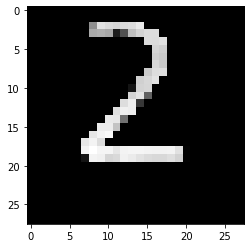

In [18]:
plt.imshow(img_rez_arr[0], cmap='gray')
plt.show()

In [19]:
### Predicting using model
pred = model.predict(img_rez_arr)

In [20]:
### Finding out predicted digit
img1_pred = np.argmax(pred[0])
img2_pred = np.argmax(pred[1])

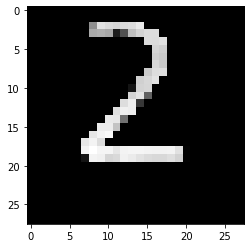

Predicted value: 2


In [21]:
plt.imshow(img_rez_arr[0], cmap='gray')
plt.show()
print("Predicted value: {}".format(img1_pred))

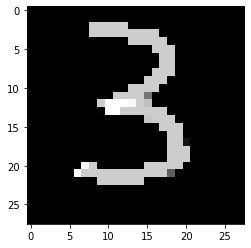

Predicted value: 3


In [22]:
plt.imshow(img_rez_arr[1], cmap='gray')
plt.show()
print("Predicted value: {}".format(img2_pred))